# Câu hỏi: **Sự thay đổi về số lượng và thể loại nội dung của Netflix qua các năm là gì?** #

**Lợi ích:**
- Giúp hiểu được xu hướng phát triển nội dung của Netflix trong việc bổ sung nội dung, cũng như cách họ ưu tiên các thể loại theo thời gian.
- Xác định xem liệu Netflix đang dần mở rộng hoặc thu hẹp chiến lược sản xuất nội dung theo thể loại và nếu có sự thay dổi rõ rệt nào trong việc lựa chọn thể loại.

**Cách làm:**
1. Tính tổng số lượng nội dung (Phim, TV Shows) được thêm vào Netflix theo từng năm (date_added).
2. Phân tích sự thay đổi về tỷ lệ giữa các thể loại (listed_in) qua các năm.
3. Vẽ biểu đồ thời gian để hiển thị số lượng nội dung theo từng thể loại qua các năm.
---

### Import thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Đọc file vào dataframe

In [2]:
df = pd.read_csv('../data/netflix_titles_cleaned.csv')
df.head()

,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,season,duration
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",NaN,90.0
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,NaN
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,NaN
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,NaN
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,NaN


# A. Tiền xử lý

Bỏ các cột không cần thiết cho câu hỏi để giảm chiều dữ liệu.

In [3]:
df = df.drop(columns=['director', 'cast', 'rating', 'description'])

One-Hot encoding cho cột `listed_in` để phân tích thể loại.

In [4]:

listed_in_encoded = df['listed_in'].str.get_dummies(sep=', ')
df = pd.concat([df, listed_in_encoded], axis=1)
df = df.drop(columns='listed_in')
df.head()

,type,title,country,date_added,release_year,season,duration,Action,Action & Adventure,Anime Features,...,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thriller,Thrillers
0,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,NaN,90.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TV Show,Blood & Water,South Africa,2021-09-24,2021,2.0,NaN,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,TV Show,Ganglands,NaN,2021-09-24,2021,1.0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TV Show,Jailbirds New Orleans,NaN,2021-09-24,2021,1.0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TV Show,Kota Factory,India,2021-09-24,2021,2.0,NaN,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# B. Phân tích

## 1. Sự thay đổi về số lượng nội dung được thêm vào Netflix qua các năm

In [16]:
# Chuyển cột date_added sang định dạng datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Trích xuất năm từ cột date_added
df['year_added'] = df['date_added'].dt.year

# Đếm số lượng nội dung theo từng năm
content_by_year = df['year_added'].value_counts().sort_index()
content_by_year.index = content_by_year.index.astype('int')

# Vì chưa tổng kết năm 2024 nên ta tạm bỏ qua trong phần tính số lượng này
content_by_year = content_by_year.drop(2024)

content_by_year

2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1648
2019    2014
2020    1879
2021    1498
Name: year_added, dtype: int64

### 1.1. Tổng số lượng nội dung qua các năm

- Biểu đồ: barchart.
- Lý do chọn biểu đồ:
    - Các cột tạo cảm giác về số lượng sẽ phù hợp hơn.
    - Số lượng năm không quá nhiều nên vẫn dùng barchart được.
    - Dễ làm nổi bật được với cột có số lượng nhiều nhất.

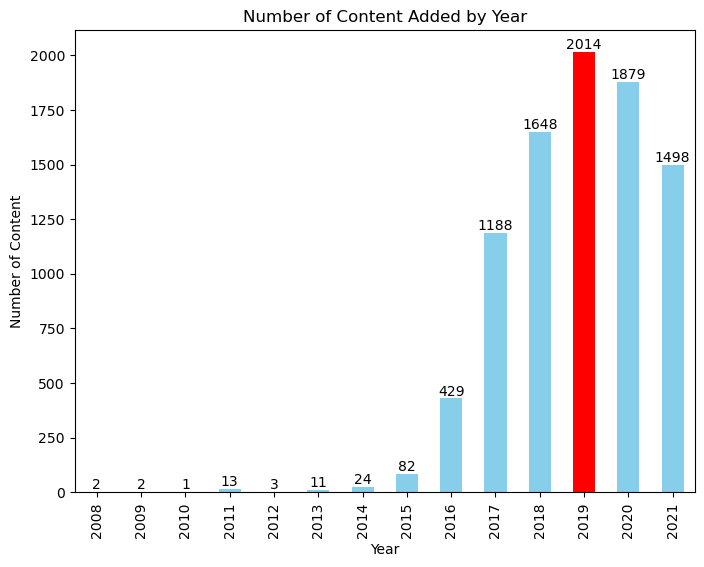

In [17]:
# Tìm năm có số lượng nội dung nhiều nhất
max_year = content_by_year.idxmax()

# Tạo danh sách màu: đỏ cho năm nhiều nhất, xanh cho các năm còn lại
colors = ['red' if year == max_year else 'skyblue' for year in content_by_year.index]

# Vẽ biểu đồ
plt.figure(figsize=(8,6))
ax = content_by_year.plot(kind='bar', color=colors)
plt.title('Number of Content Added by Year')
plt.xlabel('Year')
plt.ylabel('Number of Content')

# Thêm số lượng trên các cột
for i, value in enumerate(content_by_year):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

**Nhận xét:**
- Số lượng nội dung qua các năm tăng dần và đạt đỉnh vào năm 2019 với 2014 nội dung, là con số khá lớn nhưng sau đó số lượng lại giảm dần.
- Vào những năm từ 2008 đến 2015, số lượng nội dung được thêm vào Netflix mỗi năm rất ít, chỉ dưới 100 nội dung. Điều này là do nền tảng stream phim chưa phổ biến nhiều, nên số lượng phim được thêm vào Netfilx còn rất ít.
- Từ năm 2016 đến 2019, số lượng nội dung tăng đáng kể, lên tới con số 429 và đạt đỉnh 2014 nội dung và năm 2019. Giai đoạn từ 2016 đến 2019 có thể được giải thích bởi việc Netflix tập trung đầu tư mạnh vào nội dung và mở rộng quy mô toàn cầu. Điều này dẫn đến số lượng nội dung tăng mạnh, đạt đỉnh vào năm 2019.
- Sau năm 2019, số lượng nội dung giảm dần chỉ còn 3/4 vào năm 2021. Sau năm 2019, sự sụt giảm có thể do tác động của đại dịch COVID-19, làm gián đoạn sản xuất nội dung, dẫn đến số lượng nội dung mới giảm đáng kể trong các năm sau.

### 1.2. Tỷ lệ số lượng nội dung qua các năm

- Biều đồ: waterfall chart.
- Lý do chọn biểu đồ:
    - Thể hiện được rõ ràng số lượng tăng hay giảm qua các năm bằng vị trí của các cột.

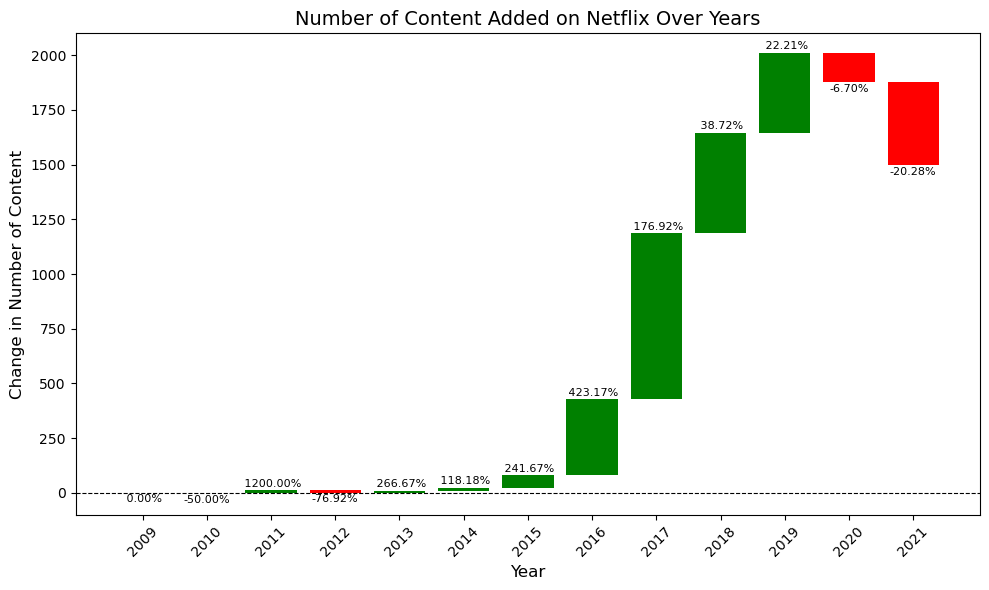

In [ ]:
# Tính phần trăm thay đổi qua các năm
content_percentage_changes = content_by_year.pct_change() * 100
content_changes = content_by_year.diff()  # Tính thay đổi tuyệt đối

# Loại bỏ giá trị đầu tiên (NaN)
content_changes = content_changes.dropna()
content_percentage_changes = content_percentage_changes.dropna()

# Xác định màu sắc: xanh (tăng), đỏ (giảm)
colors = ['green' if change > 0 else 'red' for change in content_changes]

# Vẽ Waterfall chart
fig, ax = plt.subplots(figsize=(10, 6))
previous_value = 0  # Bắt đầu từ giá trị 0
years = content_changes.index

for i, (year, change) in enumerate(zip(years, content_changes)):
    # Vẽ cột
    ax.bar(year, change, bottom=previous_value, color=colors[i])

    # Hiển thị phần trăm thay đổi
    percentage = content_percentage_changes.iloc[i]
    text_y = previous_value + change + (30 if change>0 else -30)
    ax.text(year, text_y, f'{percentage: .2f}%', ha='center', va='center', fontsize=8, color='black')

    # Cập nhật giá trị đỉnh của cột trước đó
    previous_value += change

# Thêm nhãn và tiêu đề
ax.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Đường ngang tại giá trị 0
ax.set_title('Number of Content Added on Netflix Over Years', fontsize=14)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Change in Number of Content', fontsize=12)
ax.set_xticks(years)
plt.xticks(rotation=45)
plt.ylim(-100, 2100)
plt.tight_layout()

plt.show()

**Nhận xét:**
- Tỷ lệ tăng trưởng nội dung cao nhất là vào năm 2016 với mức tăng 423.17% so với năm trước dù tổng số lượng nội dung không đạt đỉnh như năm 2019. Tỷ lệ này không chỉ là bước nhảy vọt đáng kể mà còn cho thấy Netflix bắt đầu đầu tư mạnh mẽ vào việc mở rộng thư viện nội dung của mình để cạnh tranh với các nền tảng khác. Đây cũng là giai đoạn mà Netflix tập trung chuyển đổi từ mô hình phân phối DVD sang nền tảng phát trực tuyến.
- Mặc dù thời gian đầu có 2 lần giảm nhưng đa số phần trăm tăng trưởng nội dung cho tới năm 2017 đều rất lớn (trên 100%). Đây là giai đoạn Netflix tăng trưởng và bùng nổ về số lượng nội dung thêm vào mỗi năm, phản ánh sự tự tin trong việc thu hút và giữ chân người dùng thông qua thư viện phong phú hơn. Điều này cũng gắn liền với việc ra mắt một loạt nội dung gốc đình đám (như Stranger Things vào năm 2016).
- Sau đó phần trăm tăng trưởng giảm chỉ còn dưới 50% cho đến năm 2019 cho thấy Netflix đã đạt đến một ngưỡng nhất định về khả năng thêm mới nội dung mỗi năm. Netflix có lẽ đang dần chuyển hướng chiến lược, giảm tốc độ thêm nội dung mới.
- Vào những năm 2020, 2021, tỷ lệ thêm nội dung đã giảm nhẹ (-6.07% và -20.20%)không chỉ do ảnh hưởng của đại dịch Covid-19 mà còn phản ánh việc ngành công nghiệp sản xuất nội dung bị đình trệ. Nhiều dự án sản xuất phim bị hoãn hoặc hủy bỏ do các biện pháp phong tỏa. Tuy nhiên, Netflix vẫn duy trì khả năng cung cấp nội dung mới, nhờ thư viện nội dung đã được chuẩn bị trước đó và các chiến lược mua bản quyền từ bên thứ ba. Điều này giúp nền tảng không bị gián đoạn hoàn toàn, mặc dù tốc độ tăng trưởng giảm.

### 1.3. Kết luận

Netflix trải qua 3 giai đoạn chính:
1. 2008-2015: Giai đoạn phát triển chậm
    - Số lượng nội dung tăng trưởng thấp, dưới 100 nội dung mỗi năm, phản ánh sự thử nghiệm và chuẩn bị cho chuyển đổi sang phát trực tuyến.
2. 2016-2019: Giai đoạn bùng nổ
    - Tỷ lệ tăng trưởng đạt đỉnh năm 2016 (+423.17%), số lượng nội dung đạt đỉnh năm 2019 (2014 nội dung). Đây là thời kỳ Netflix đầu tư mạnh mẽ vào nội dung và mở rộng toàn cầu.
3. 2020-2021: Giai đoạn suy giảm
    - Số lượng và tỷ lệ tăng trưởng giảm do đại dịch Covid-19 và điều chỉnh chiến lược tập trung vào chất lượng nội dung.

 Netflix từ phát triển chậm đã bùng nổ mạnh mẽ, sau đó điều chỉnh để thích ứng với thị trường và các yếu tố ngoại cảnh, duy trì vị thế qua chiến lược chất lượng.

## 2. Sự thay đổi về thể loại nội dung qua các năm

In [50]:
# Lấy danh sách các thể loại
genres = listed_in_encoded.columns
genres

Index(['Action', 'Action & Adventure', 'Anime Features', 'Anime Series',
       'British TV Shows', 'Children & Family Movies', 'Classic & Cult TV',
       'Classic Movies', 'Comedies', 'Crime TV Shows', 'Cult Movies',
       'Documentaries', 'Docuseries', 'Drama', 'Dramas',
       'Faith & Spirituality', 'Horror', 'Horror Movies', 'Independent Movies',
       'International Movies', 'International TV Shows', 'Kids' TV',
       'Korean TV Shows', 'LGBTQ Movies', 'Movies', 'Music & Musicals',
       'Reality TV', 'Romance', 'Romantic Movies', 'Romantic TV Shows',
       'Sci-Fi & Fantasy', 'Sci-fi', 'Science & Nature TV',
       'Spanish-Language TV Shows', 'Sports Movies', 'Stand-Up Comedy',
       'Stand-Up Comedy & Talk Shows', 'TV Action & Adventure', 'TV Comedies',
       'TV Dramas', 'TV Horror', 'TV Mysteries', 'TV Sci-Fi & Fantasy',
       'TV Shows', 'TV Thrillers', 'Teen TV Shows', 'Thriller', 'Thrillers'],
      dtype='object')

### 2.1. Xu hướng chung về thể loại qua các năm

### 2.2. Thể loại nổi bật theo từng giai đoạn

### 2.3. Sự đa dạng về thể loại qua các năm

### 2.4. Kết luận

## 3. Kết luận